In [1]:
import torch
print(torch.cuda.is_available())


True


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

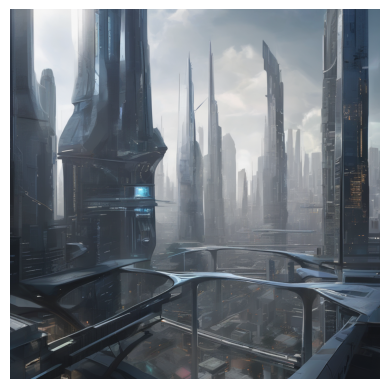

In [2]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Path to your downloaded model weights
model_path = "/home/afgan/afgan_rebuttal_experiments/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0"

# Load the model
model = DiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)

# Check if CUDA is available (GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Test with a simple prompt
prompt = "A futuristic city skyline"
image = model(prompt).images[0]

# Use matplotlib to display the generated image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
PROJECT_NAME = "Stable_Diffusion_FaceExpr"
MODEL_NAME = "/home/afgan/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0"
DATA_DIR = "/home/afgan/Input_Identity_dataset_512x512/e_w4/"
OUTPUT_DIR = "/home/afgan/FaceExpr_Weights/ID_e_w4_fine_tune"

Found 12 images
Loaded 12 images


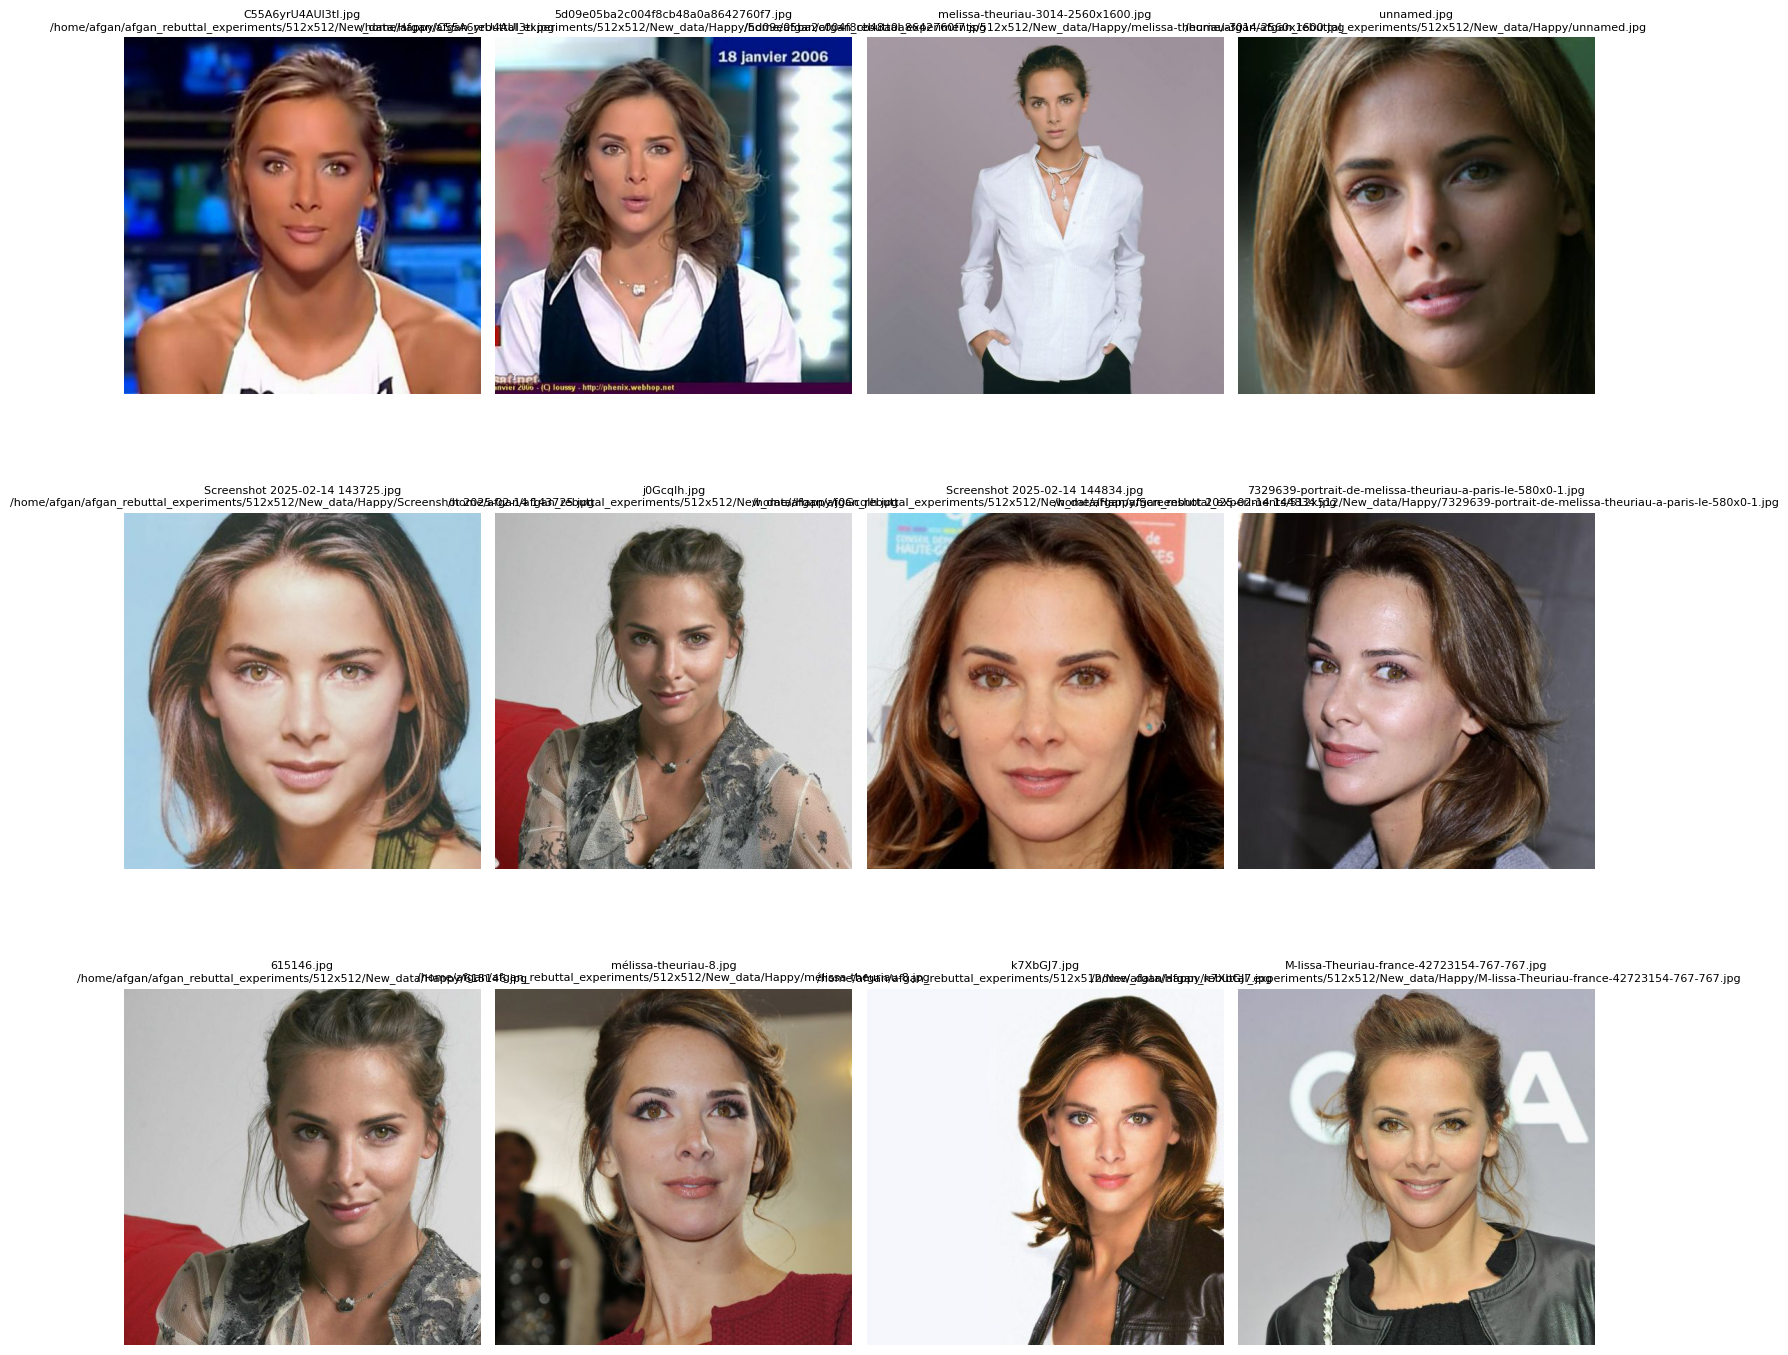

In [5]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

# Get image paths
image_paths = glob.glob("/home/afgan/Input_Identity_dataset_512x512/e_w4/*.[pj]*[np]*[g]*")

print(f"Found {len(image_paths)} images")  # Debugging: Check number of images

# Load images
imgs = [Image.open(path) for path in image_paths]
print(f"Loaded {len(imgs)} images")  # Debugging: Check if images are loaded

# Set up the figure
num_imgs = len(imgs)
cols = 4  # Number of columns in grid
rows = (num_imgs // cols) + (num_imgs % cols > 0)  # Calculate rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust size

# Flatten axes array for easy indexing (if there's only one row, make it a list)
axes = axes.flatten() if num_imgs > 1 else [axes]

for i, (img, path) in enumerate(zip(imgs, image_paths)):
    axes[i].imshow(img)
    axes[i].axis("off")  # Hide axes
    file_name = os.path.basename(path)  # Get only the filename
    axes[i].set_title(f"{file_name}\n{path}", fontsize=8)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
import os

model_path = MODEL_NAME
required_files = ["vae", "text_encoder", "tokenizer", "unet"]

if os.path.exists(model_path):
    print("✅ Model directory exists.")
    for f in required_files:
        if os.path.exists(os.path.join(model_path, f)):
            print(f"✅ {f} exists.")
        else:
            print(f"❌ {f} is missing.")
else:
    print("❌ Model directory does not exist.")


✅ Model directory exists.
✅ vae exists.
✅ text_encoder exists.
✅ tokenizer exists.
✅ unet exists.


In [7]:
data_dir = DATA_DIR

if os.path.exists(data_dir) and len(os.listdir(data_dir)) > 0:
    print(f"✅ Dataset found with {len(os.listdir(data_dir))} images.")
else:
    print("❌ Dataset folder is missing or empty.")


✅ Dataset found with 12 images.


In [8]:
repo_path = REPO_ID

if os.path.exists(repo_path):
    print("✅ Fine-tuned model directory exists.")
else:
    print("⚠️ Fine-tuned model directory does not exist yet (it will be created during training).")


⚠️ Fine-tuned model directory does not exist yet (it will be created during training).


In [9]:
from diffusers import StableDiffusionPipeline
import torch

# Define model path correctly
MODEL_NAME = MODEL_NAME

# Load the model
pipeline = StableDiffusionPipeline.from_pretrained(MODEL_NAME, torch_dtype=torch.float16)
pipeline.to("cuda")  # Use GPU if available
print("Loading model from:", MODEL_NAME)



Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading model from: /home/afgan/afgan_rebuttal_experiments/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0


In [ ]:
#!/usr/bin/env bash
!accelerate launch train_FaceExpr_afgan.py \
  --pretrained_model_name_or_path="$MODEL_NAME" \
  --pretrained_vae_model_name_or_path="/home/afgan/stable_diffusion_weights/madebyollinsdxl-vae-fp16-fix" \
  --dataset_name="$DATA_DIR" \
  --output_dir="$OUTPUT_DIR" \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of e_w4 woman" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --gradient_checkpointing \
  --learning_rate=1e-4 \
  --snr_gamma=5.0 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_8bit_adam \
  --max_train_steps=400 \
  --seed=0


Loaded text_encoder as CLIPTextModel from `text_encoder` subfolder of /home/xpzhao/projects/dmsheng/afgan_rebuttal_experiments/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0.

Loading pipeline components...:  57%|███████▍     | 4/7 [00:04<00:03,  1.06s/it]Loaded tokenizer_2 as CLIPTokenizer from `tokenizer_2` subfolder of /home/xpzhao/projects/dmsheng/afgan_rebuttal_experiments/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0.
Loaded text_encoder_2 as CLIPTextModelWithProjection from `text_encoder_2` subfolder of /home/xpzhao/projects/dmsheng/afgan_rebuttal_experiments/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0.

Loading pipeline components...: 100%|█████████████| 7/7 [00:06<00:00,  1.10it/s]
Loading unet.
Steps: 100%|█████████| 1000/1000 [49:58<00:00,  3.00s/it, loss=0.168, lr=0.0001]


In [52]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL
lora_weights_path ="/home/afgan/FaceExpr_Weights/ID_e_w4_fine_tune"
vae = AutoencoderKL.from_pretrained("/home/afgan/stable_diffusion_weights/madebyollinsdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "/home/afgan/stable_diffusion_weights/stabilityaistable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights(lora_weights_path)
_ = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

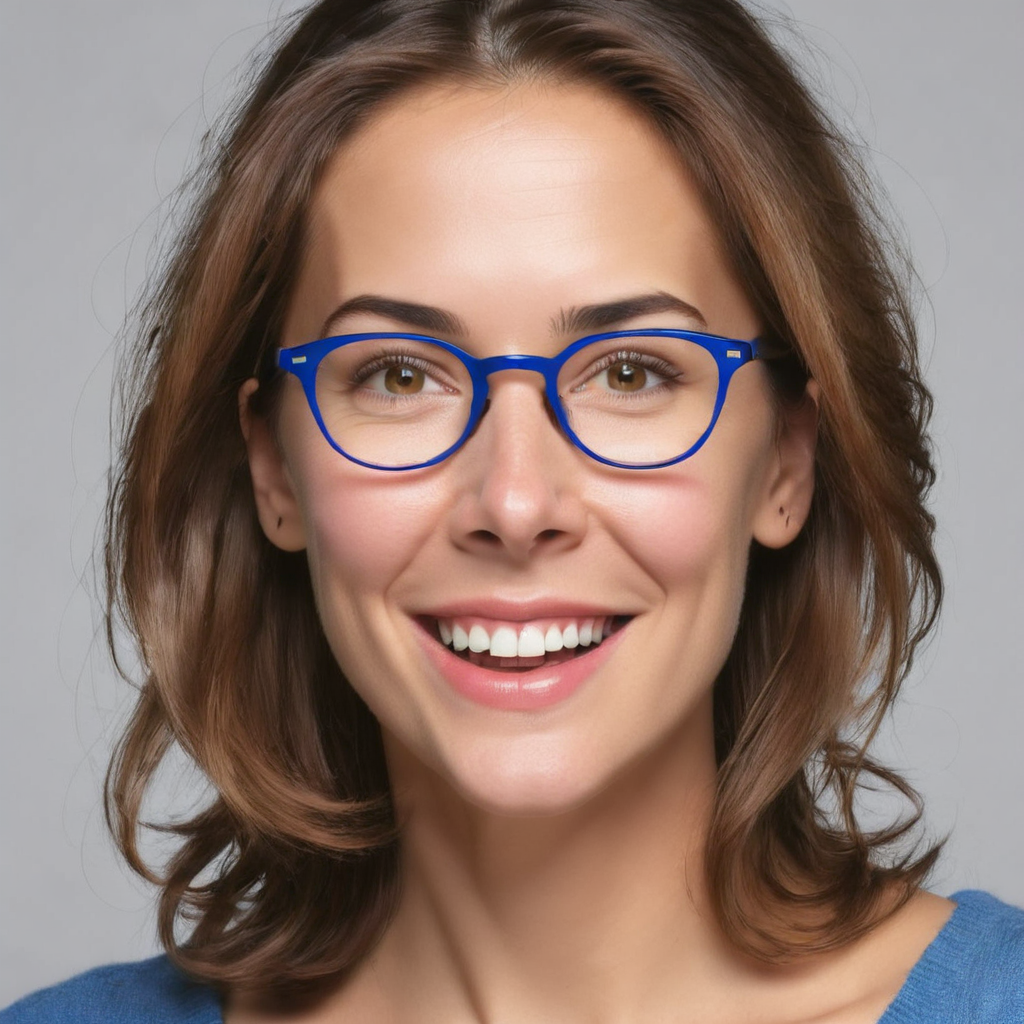

In [53]:
prompt = "A front photo of e_w4 woma, happy, wearing blue glasse."
image = pipe(prompt=prompt, num_inference_steps=20).images[0]
image


